In [ ]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing

In [ ]:
# how good is the work of a linear regression?

| Name             | Description                                                   |
|------------------|---------------------------------------------------------------|
| MedInc           | Median income in block group (in tens of thousands of dollars)|
| HouseAge         | Median house age in block group (in years)                    |
| AveRooms         | Average number of rooms per household                         |
| AveBedrms        | Average number of bedrooms per household                      |
| Population       | Total population of the block group                           |
| AveOccup         | Average number of household members                           |
| Latitude         | Latitude of the block group (geographic coordinate)           |
| Longitude        | Longitude of the block group (geographic coordinate)          |
| **Target**       | Median house value in block group (in hundreds of thousands)  |


In [ ]:
# Dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Median house value in $100,000s
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


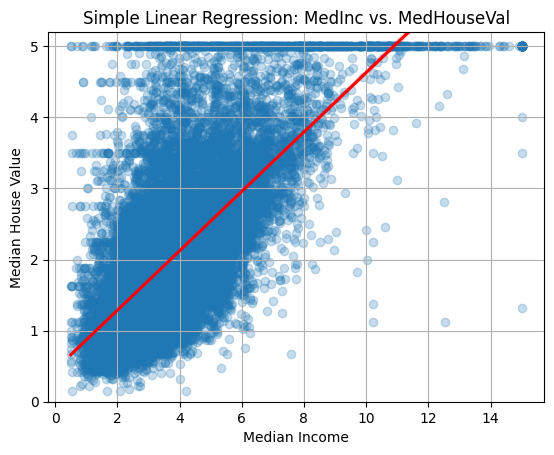

In [ ]:
sns.regplot(x="MedInc", y="MedHouseVal",
            scatter=True, order=1,
            scatter_kws={'alpha': 0.25},
            line_kws={'color': 'red'},
            data=df)
plt.title("Simple Linear Regression: MedInc vs. MedHouseVal")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.grid(True)
plt.ylim(0, 5.2)
plt.show()

In [ ]:
X = df[['MedInc']]         # Features
y = df['MedHouseVal']      # Dependet variabible
# Fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(mean_squared_error(y, y_pred))

0.7011311502929527


In [ ]:
# What is mean_squared_error?
# We are conducting to misleading results?

# Metrics

To assess the goodness of the model we can uses:
* Mean Absolute error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* R-squared ($R^{2}$)

The definitions area:
 \begin{equation}
 MAE = \frac{1}{n} \sum_{i=1}^{n}  \vert y_{i} - \hat{y_{i}}  \vert
 \end{equation}


```python
from sklearn.metrics import mean_absolute_error
```

 \begin{equation}
MSE = \sum_{i=1}^{n} (y_{i} - y_{i})^{2}
 \end{equation}


```python
 from sklearn.metrics import mean_squared_error
```

\begin{equation}
RMSE = \sqrt{MSE}
\end{equation}

```python
from sklearn.metrics import mean_squared_error
```




The R squared is a measure of explanation.

```python
from sklearn.metrics import r2_score
```

# Train_test_split

In real life scenarios you need assess the quality of the model to asses unforseen data, this is the most important part of the deployment model!
the model can learn hidden pattner and overfit the results!!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Take in mind that is univarite yet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.7091157771765549


In [ ]:
# Multivariate
target = 'MedHouseVal'
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.5558915986952444
